In [1]:
#数据增强
from keras.preprocessing.image import ImageDataGenerator
path='original_data'
dst_path='gen_data'
datagen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,
                          height_shift_range=0.02,horizontal_flip=True,
                          vertical_flip=True)
gen=datagen.flow_from_directory(path,target_size=(224,224),
                               batch_size=2,
                               save_to_dir=dst_path,
                               save_prefix='gen',save_format='jpg')
for i in range(100):
    gen.next()

Using TensorFlow backend.


Found 10 images belonging to 1 classes.


(224, 224, 3)


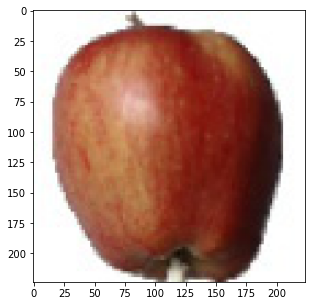

In [2]:
from keras.preprocessing.image import load_img,img_to_array
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from matplotlib import pyplot as plt
img_path='1.jpg'
img=load_img(img_path,target_size=(224,224))
type(img)
fig1=plt.figure(figsize=(5,5))
plt.imshow(img)

img=img_to_array(img)
type(img)
print(img.shape)

model_vgg=VGG16(weights='imagenet',include_top=False)
X=np.expand_dims(img,axis=0)

In [3]:
#特征提取
features=model_vgg.predict(X)
print(features.shape)

(1, 7, 7, 512)


In [4]:
#flatten
features=features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


In [5]:
#list all the names of the data
import os
folder='train_data'
dirs=os.listdir(folder)
img_path=[]
for i in dirs:
    if os.path.splitext(i)[1]=='.jpg':
        img_path.append(i)
img_path=[folder+"//"+i for i in img_path]
print(img_path)

['train_data//gen_0_9114649.jpg', 'train_data//gen_1_9380997.jpg', 'train_data//gen_4_3428940.jpg', 'train_data//gen_9_4955335.jpg', 'train_data//gen_0_100234.jpg', 'train_data//gen_4_4287190.jpg', 'train_data//gen_5_7298607.jpg', 'train_data//gen_2_9231055.jpg', 'train_data//gen_9_154394.jpg', 'train_data//gen_6_4291738.jpg', 'train_data//gen_6_2596425.jpg', 'train_data//gen_3_6538212.jpg', 'train_data//gen_8_8753026.jpg', 'train_data//gen_5_129110.jpg', 'train_data//gen_7_9474769.jpg', 'train_data//gen_3_5789938.jpg', 'train_data//gen_4_4351933.jpg', 'train_data//gen_4_8481861.jpg', 'train_data//gen_3_4027391.jpg', 'train_data//gen_4_5172102.jpg', 'train_data//gen_5_3170967.jpg', 'train_data//gen_3_2887789.jpg', 'train_data//gen_5_2008713.jpg', 'train_data//gen_4_2785560.jpg', 'train_data//gen_2_498943.jpg', 'train_data//gen_8_2896271.jpg', 'train_data//gen_7_63512.jpg', 'train_data//gen_1_4035954.jpg', 'train_data//gen_3_3718206.jpg', 'train_data//gen_7_828588.jpg', 'train_data//gen

In [6]:
def modelProcess(img_path,model):
    img=load_img(img_path,target_size=(224,224))
    img=img_to_array(img)
    X=np.expand_dims(img,axis=0)
    X=preprocess_input(X)
    X_VGG=model.predict(X)
    X_VGG=X_VGG.reshape(1,7*7*512)
    return X_VGG

In [7]:
features_train=np.zeros([len(img_path),7*7*512])
for i in range(len(img_path)):
    feature_i=modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features_train[i]=feature_i

preprocessed: train_data//gen_0_9114649.jpg
preprocessed: train_data//gen_1_9380997.jpg
preprocessed: train_data//gen_4_3428940.jpg
preprocessed: train_data//gen_9_4955335.jpg
preprocessed: train_data//gen_0_100234.jpg
preprocessed: train_data//gen_4_4287190.jpg
preprocessed: train_data//gen_5_7298607.jpg
preprocessed: train_data//gen_2_9231055.jpg
preprocessed: train_data//gen_9_154394.jpg
preprocessed: train_data//gen_6_4291738.jpg
preprocessed: train_data//gen_6_2596425.jpg
preprocessed: train_data//gen_3_6538212.jpg
preprocessed: train_data//gen_8_8753026.jpg
preprocessed: train_data//gen_5_129110.jpg
preprocessed: train_data//gen_7_9474769.jpg
preprocessed: train_data//gen_3_5789938.jpg
preprocessed: train_data//gen_4_4351933.jpg
preprocessed: train_data//gen_4_8481861.jpg
preprocessed: train_data//gen_3_4027391.jpg
preprocessed: train_data//gen_4_5172102.jpg
preprocessed: train_data//gen_5_3170967.jpg
preprocessed: train_data//gen_3_2887789.jpg
preprocessed: train_data//gen_5_200

preprocessed: train_data//gen_5_8174098.jpg
preprocessed: train_data//gen_5_1676083.jpg
preprocessed: train_data//gen_0_9129064.jpg
preprocessed: train_data//gen_7_9017347.jpg
preprocessed: train_data//gen_0_3554009.jpg
preprocessed: train_data//gen_6_1817771.jpg
preprocessed: train_data//gen_1_6088643.jpg
preprocessed: train_data//gen_6_6902491.jpg
preprocessed: train_data//gen_7_7446864.jpg
preprocessed: train_data//gen_4_4376952.jpg
preprocessed: train_data//gen_5_8649754.jpg
preprocessed: train_data//gen_0_9421620.jpg
preprocessed: train_data//gen_3_8065520.jpg
preprocessed: train_data//gen_5_3263428.jpg
preprocessed: train_data//gen_7_2785133.jpg
preprocessed: train_data//gen_1_1835687.jpg
preprocessed: train_data//gen_8_7357777.jpg
preprocessed: train_data//gen_4_3579863.jpg
preprocessed: train_data//gen_3_6469252.jpg
preprocessed: train_data//gen_0_6306318.jpg
preprocessed: train_data//gen_2_4408130.jpg
preprocessed: train_data//gen_8_9671410.jpg
preprocessed: train_data//gen_2_

In [8]:
print(features_train.shape)

(230, 25088)


In [9]:
X=features_train
from sklearn.cluster import KMeans
cnn_kmeans=KMeans(n_clusters=2,max_iter=2000)
cnn_kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
y_predict_kmeans=cnn_kmeans.predict(X)
y_predict_kmeans

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int32)

In [12]:
from collections import Counter
print(Counter(y_predict_kmeans))

Counter({1: 117, 0: 113})


In [16]:
normal_apple_id=1

IndexError: index 240 is out of bounds for axis 0 with size 230

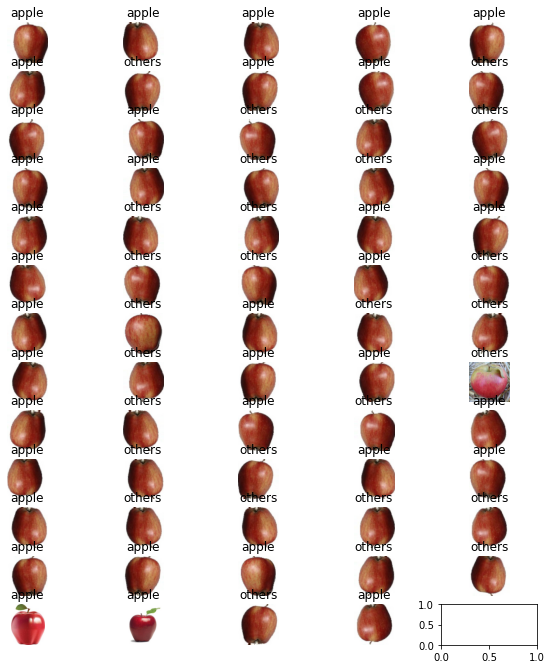

In [17]:
from matplotlib import pyplot as plt
fig2=plt.figure(figsize=(10,40))
for i in range(45):
    for j in range(5):
        img=load_img(img_path[i*5+j])
        plt.subplot(45,5,i*5+j+1)
        plt.title('apple' if y_predict_kmeans[i*5*j]==normal_apple_id else 'others')
        plt.imshow(img)
        plt.axis('off')

In [19]:
import os
folder='test_data'
dirs=os.listdir(folder)
img_path=[]
for i in dirs:
    if os.path.splitext(i)[1]=='.jpg':
        img_path.append(i)
img_path=[folder+"//"+i for i in img_path]
print(img_path)

['test_data//xx_8_5910781.jpg', 'test_data//xx_7_4698934.jpg', 'test_data//xx_0_1133520.jpg', 'test_data//xx_2_1588073.jpg', 'test_data//xx_3_3378731.jpg', 'test_data//xx_1_586816.jpg', 'test_data//xx_14_6969294.jpg', 'test_data//xx_12_5963907.jpg', 'test_data//xx_9_3279522.jpg', 'test_data//3.jpg', 'test_data//1.jpg', 'test_data//xx_5_4481562.jpg']


In [20]:
def modelProcess(img_path,model):
    img=load_img(img_path,target_size=(224,224))
    img=img_to_array(img)
    X=np.expand_dims(img,axis=0)
    X=preprocess_input(X)
    X_VGG=model.predict(X)
    X_VGG=X_VGG.reshape(1,7*7*512)
    return X_VGG

In [22]:
features_train=np.zeros([len(img_path),7*7*512])
for i in range(len(img_path)):
    feature_i=modelProcess(img_path[i],model_vgg)
    print('processed:',img_path[i])
    features_train[i]=feature_i
X_test=features_train

processed: test_data//xx_8_5910781.jpg
processed: test_data//xx_7_4698934.jpg
processed: test_data//xx_0_1133520.jpg
processed: test_data//xx_2_1588073.jpg
processed: test_data//xx_3_3378731.jpg
processed: test_data//xx_1_586816.jpg
processed: test_data//xx_14_6969294.jpg
processed: test_data//xx_12_5963907.jpg
processed: test_data//xx_9_3279522.jpg
processed: test_data//3.jpg
processed: test_data//1.jpg
processed: test_data//xx_5_4481562.jpg


In [27]:
y_predict_keams_test=cnn_kmeans.predict(X_test)
print(y_predict_keams_test)

[1 1 0 1 1 1 1 1 1 0 0 1]


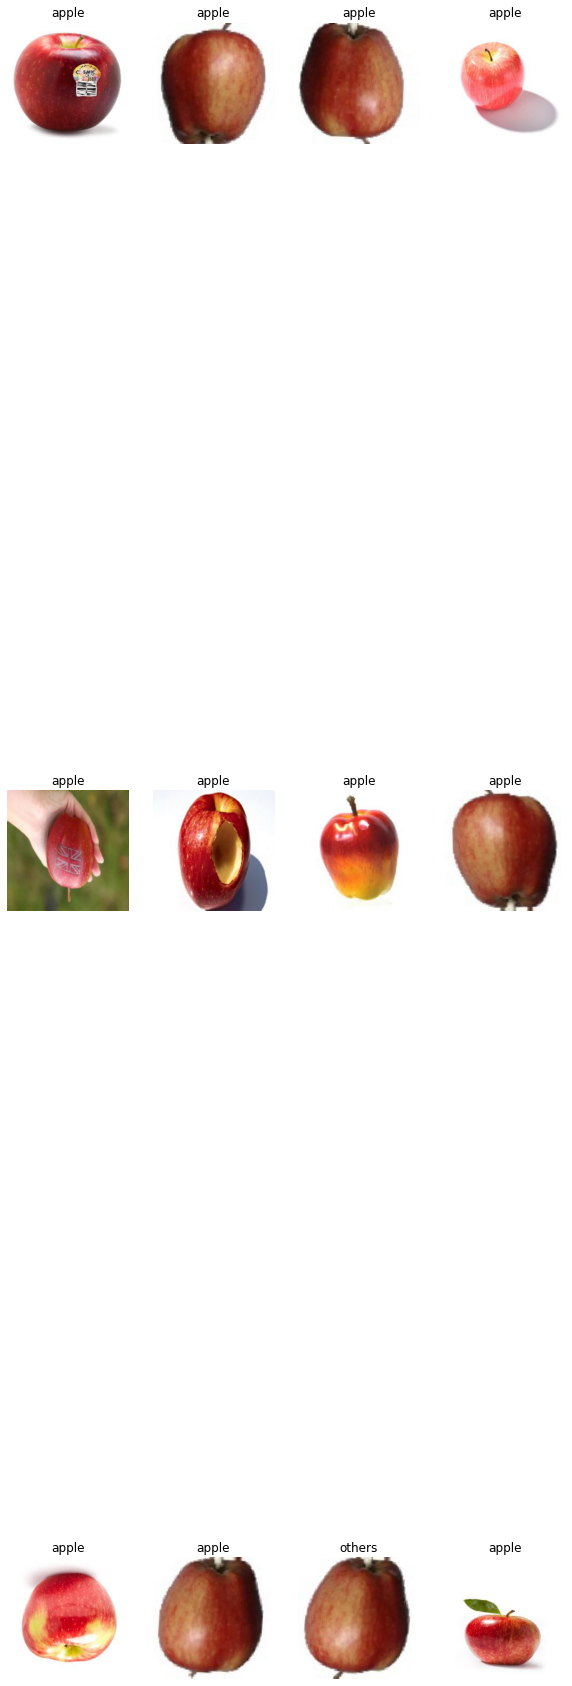

In [30]:
fig2=plt.figure(figsize=(10,40))
for i in range(3):
    for j in range(4):
        img=load_img(img_path[i*4+j])
        plt.subplot(3,4,i*4+j+1)
        plt.title('apple' if y_predict_kmeans[i*4*j]==normal_apple_id else 'others')
        plt.imshow(img),plt.axis('off')

In [32]:
from sklearn.cluster import MeanShift,estimate_bandwidth
bw=estimate_bandwidth(X,n_samples=140)
print(bw)
cnn_ms=MeanShift(bandwidth=bw)
cnn_ms.fit(X)

1218.4580391804107


MeanShift(bandwidth=1218.4580391804107, bin_seeding=False, cluster_all=True,
     min_bin_freq=1, n_jobs=None, seeds=None)

In [33]:
y_predict_ms=cnn_ms.predict(X)
print(y_predict_ms)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0
  0  7  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 11  6  0  0  0  0  0  0  0  0  0  0  0 10  3  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  8  2  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [34]:
print(Counter(y_predict_ms))

Counter({0: 218, 1: 1, 12: 1, 7: 1, 4: 1, 11: 1, 6: 1, 10: 1, 3: 1, 9: 1, 8: 1, 2: 1, 5: 1})


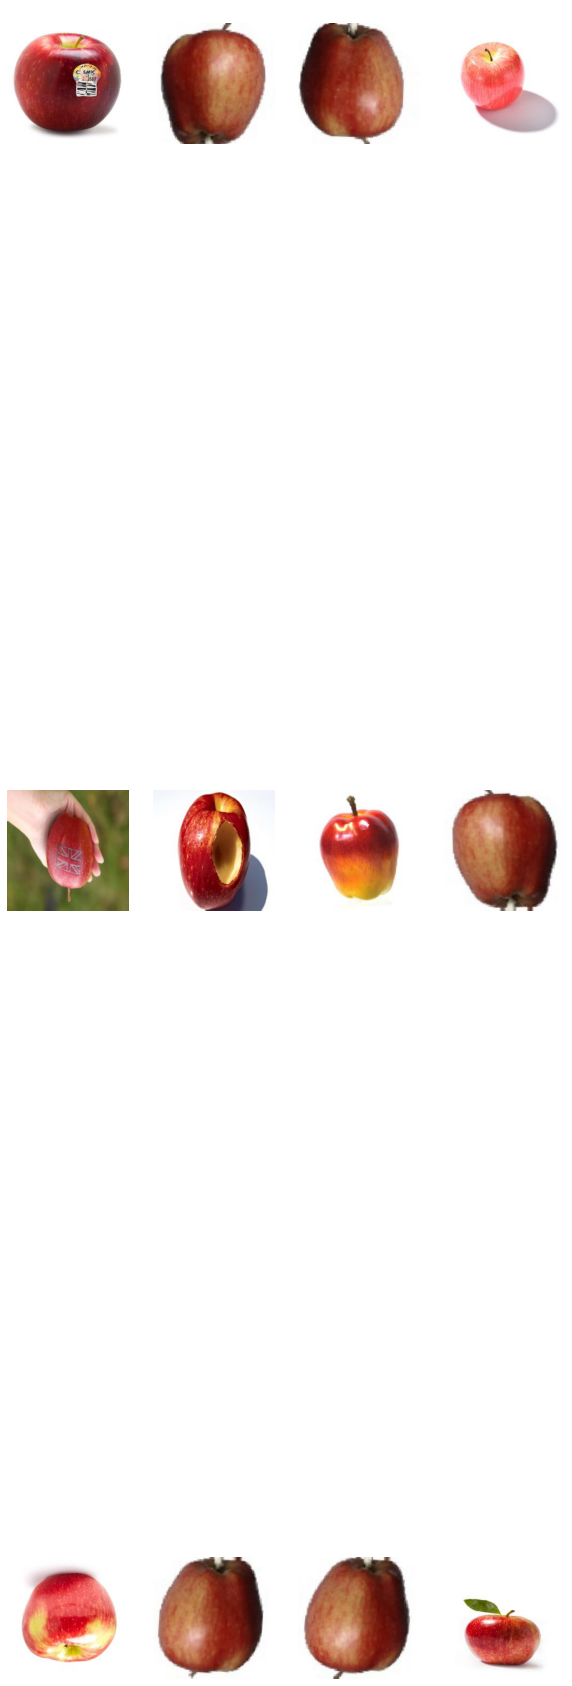

In [36]:
normal_apple_id=0
fig2=plt.figure(figsize=(10,40))
for i in range(3):
    for j in range(4):
        img=load_img(img_path[i*4+j])
        plt.subplot(3,4,i*4+j+1)
        plt.title('apple' if y_predict_ms[i*4*j]==normal_apple_id else 'others',color='w')
        plt.imshow(img),plt.axis('off')

IndexError: list index out of range

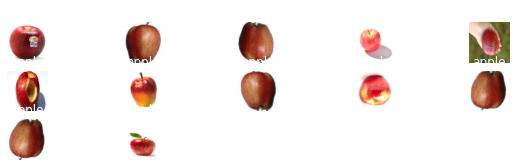

In [37]:
fig2=plt.figure(figsize=(10,40))
for i in range(45):
    for j in range(5):
        img=load_img(img_path[i*5+j])
        plt.subplot(45,5,i*5+j+1)
        plt.title('apple' if y_predict_ms[i*5*j]==normal_apple_id else 'others',color='w')
        plt.imshow(img)
        plt.axis('off')

In [39]:
# pca
from sklearn.preprocessing import StandardScaler
stds=StandardScaler()
X_norm=stds.fit_transform(X)

from sklearn.decomposition import PCA
pca=PCA(n_components=200)
X_pca=pca.fit_transform(X_norm)

In [40]:
var_ratio=pca.explained_variance_ratio_

In [41]:
print(np.sum(var_ratio))

0.9836470286930157


In [42]:
print(X_pca.shape)

(230, 200)


In [46]:
bw=estimate_bandwidth(X_pca,n_samples=140)
print(bw)
cnn_pca_ms=MeanShift(bandwidth=bw)
cnn_pca_ms.fit(X_pca)

144.91124779868676


MeanShift(bandwidth=144.91124779868676, bin_seeding=False, cluster_all=True,
     min_bin_freq=1, n_jobs=None, seeds=None)

In [49]:
Counter(cnn_pca_ms.predict(X_pca))

Counter({0: 204,
         24: 2,
         22: 1,
         20: 1,
         25: 1,
         1: 1,
         18: 1,
         4: 1,
         9: 1,
         14: 1,
         8: 1,
         17: 1,
         2: 1,
         12: 1,
         6: 1,
         11: 1,
         13: 1,
         7: 1,
         5: 1,
         3: 1,
         16: 1,
         19: 1,
         10: 1,
         15: 1,
         21: 1,
         23: 1})